In [1]:
from UCLSE.dyna_q.Experiment2b import Experiment,Dyna_QAgentTabular,SimpleRLEnv_mod
from UCLSE.dyna_q.dyna_q import TabularMemory
import numpy as np
import pandas as pd
import visdom

import threading
import logging
from queue import Queue
import random

In [2]:
vis=visdom.Visdom(port=8097)

In [3]:
f=SimpleRLEnv_mod.randint_wrap(0,0)
f()

0

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    7    3   ZIP9_7_1  1     NaN  ZIP9
90    33   37  ZIP6_33_2 1     NaN  ZIP6
91    24   28  HBL9_24_0 1     NaN  HBL9
92    32   36  HBL5_32_0 1     NaN  HBL5
93    26   30  ZIP7_26_2 1     NaN  ZIP7
      42   44  ZIP0_42_2 1     NaN  ZIP0
94    16   18  ZIP2_16_0 1     NaN  ZIP2
      29   34  HBL6_29_1 1     NaN  HBL6
95    25   29  HBL3_25_0 1     NaN  HBL3
96    18   22  ZIP5_18_0 1     NaN  ZIP5
98    21   27  HBL7_21_1 1     NaN  HBL7
      31   35  HBL8_31_0 1     NaN  HBL8
103   48   49  CON1_48_5 1     NaN  CON1
      50   52  CON7_50_0 1     NaN  CON7
104   52   54  CON9_52_6 1     NaN  CON9
106   40   42  CON8_40_1 1    CON8   NaN
107   20   26  HBL4_20_0 1    HBL4   NaN
      33   38  ZIP6_33_3 1    ZIP6   NaN
      38   39  HBL2_38_0 1    HBL2   NaN
      41   43  HBL

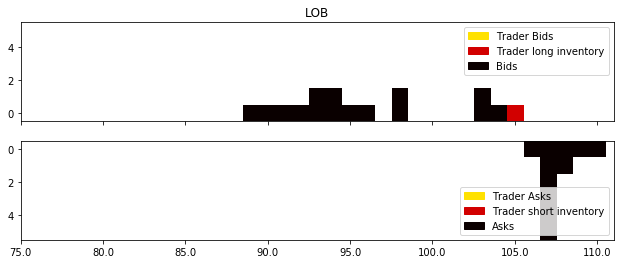

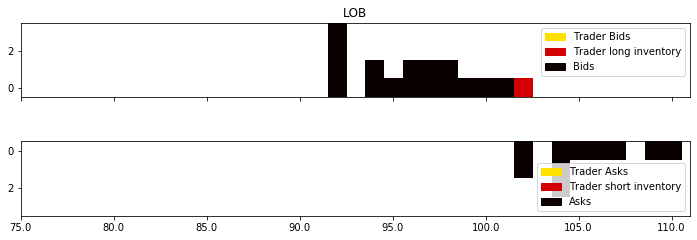

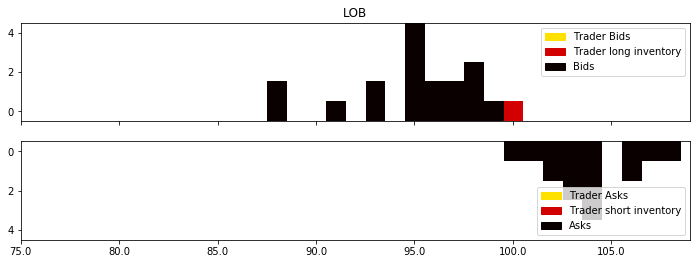

In [4]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':5000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2,'fake_cash':(0,3)}


exploration ={"mode":'UCB',
        "type": "exponential",
        "init_epsilon": 0.8,
        "min_epsilon": 0.05,
        "decay_steps": 100000,
        "decay_eps": 0.99,
        "choice":'least_bonus'}

dyna_kwargs={'n_actions':5,'initial_Q':1,'init_epsilon':0.8,'exploration':exploration,'n_statespace':9}



experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,dyna_kwargs,agent_kwargs=None,visdom=vis,dyna_Q_agent=Dyna_QAgentTabular)

In [5]:
experiment.new_train_setup(planning_steps=1,planning=True,graph=True,MaxEpisodes=1000)
experiment.train(MaxEpisodes=30000,folder='checkpoints/exp2UCBproper',start_episode=experiment.episode)

Exploration is UCB
Dyna-Q - EXP: 1 | Ep: 21 | timestep: 21 | Ep_r:  -2.7479999999999998 Profit: -1 Avg loss:-1.3600952380952382 |  Time to backup 0
Dyna-Q - EXP: 1 | Ep: 41 | timestep: 7 | Ep_r:  -0.988 Profit: -1 Avg loss:-0.8564390243902439 |  Time to backup 0
Dyna-Q - EXP: 1 | Ep: 61 | timestep: 3 | Ep_r:  0.008000000000000007 Profit: -1 Avg loss:-0.5776799999999999 |  Time to backup 0
Dyna-Q - EXP: 1 | Ep: 81 | timestep: 4 | Ep_r:  -1.992 Profit: -1 Avg loss:-0.7379999999999999 |  Time to backup 0
Dyna-Q - EXP: 1 | Ep: 101 | timestep: 17 | Ep_r:  -1.952 Profit: -1 Avg loss:-1.0552 |  Time to backup 0
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 121 | timestep: 2 | Ep_r:  -1.996 Profit: -1 Avg loss:-0.6851999999999999 |  Time to backup 0.015638351440429688
Dyna-Q - EXP:

adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 961 | timestep: 1 | Ep_r:  -1.7999999999999998 Profit: 41 Avg loss:-0.81292 |  Time to backup 0.0468900203704834
Dyna-Q - EXP: 1 | Ep: 981 | timestep: 5 | Ep_r:  -1.896 Profit: -1 Avg loss:-0.8135199999999999 |  Time to backup 0.04689621925354004
Dyna-Q - EXP: 1 | Ep: 1001 | timestep: 13 | Ep_r:  -2.992 Profit: -2 Avg loss:-0.81304 |  Time to backup 0.046866416931152344
Saving checkpoint at episode 1000
Dyna-Q - EXP: 1 | Ep: 1021 | timestep: 41 | Ep_r:  -0.8999999999999998 Profit: -2 Avg loss:-1.20032 |  Time to backup 0.04686379432678223
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1041 | timestep: 34 | Ep_r:  0.10399999999999998 Profit: 0 Avg loss:-1.2988399999999998 |  Time to backup 0.0615997314453125
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1061 | timestep: 5 | Ep_r:  0.01200000

adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1821 | timestep: 5 | Ep_r:  -3.0839999999999996 Profit: -3 Avg loss:-0.7567599999999999 |  Time to backup 0.09372925758361816
Dyna-Q - EXP: 1 | Ep: 1841 | timestep: 1 | Ep_r:  -1.7999999999999998 Profit: 0 Avg loss:-0.4574799999999999 |  Time to backup 0.09372711181640625
Dyna-Q - EXP: 1 | Ep: 1861 | timestep: 64 | Ep_r:  -2.796 Profit: -1 Avg loss:-0.5134399999999999 |  Time to backup 0.10932040214538574
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1881 | timestep: 18 | Ep_r:  -3.844 Profit: -4 Avg loss:-0.6475599999999999 |  Time to backup 0.15616202354431152
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 1901 | timestep: 100 | Ep_r:  1.3960000000000001 Profit: 1 Avg loss:-0.5600399999999999 |  Time to backup

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 2681 | timestep: 25 | Ep_r:  -1.928 Profit: -2 Avg loss:-1.00552 |  Time to backup 0.15659022331237793
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 2701 | timestep: 24 | Ep_r:  1.08 Profit: 1 Avg loss:-1.02672 |  Time to backup 0.15621471405029297
Dyna-Q - EXP: 1 | Ep: 2721 | timestep: 28 | Ep_r:  -1.842 Profit: -2 Avg loss:-0.821 |  Time to backup 0.1562211513519287
Dyna-Q - EXP: 1 | Ep: 2741 | timestep: 17 | Ep_r:  -0.9480000000000002 Profit: -3 Avg loss:-0.8610799999999997 |  Time to backup 0.16399383544921875
Dyna-Q - EXP: 1 | Ep: 2761 | timestep: 23 | Ep_r:  -1.8319999999999999 Profit: 0 Avg loss:-0.9811999999999999 |  Time to backup 0.16184258460998535
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made


Dyna-Q - EXP: 1 | Ep: 3501 | timestep: 5 | Ep_r:  2.220446049250313e-16 Profit: -1 Avg loss:-0.78136 |  Time to backup 0.2187049388885498
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 3521 | timestep: 19 | Ep_r:  -5.878 Profit: -2 Avg loss:-1.0144 |  Time to backup 0.23474407196044922
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 3541 | timestep: 32 | Ep_r:  1.1920000000000002 Profit: 1 Avg loss:-0.6306400000000001 |  Time to backup 0.2030777931213379
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 3561 | timestep: 66 | Ep_r:  1.304 Profit: 0 Avg loss:-0.6750399999999998 |  Time to backup 0.23394441604614258
Dyna-Q - EXP: 1 | Ep: 3581 | timestep: 31 | Ep_r:  -0.6839999999999997 Profit: 1 Avg loss:-0.2017999999999999 |  Time to backup 0.21269845962524414
Dyna-Q - EXP: 1 | Ep: 3601 | timestep: 38 | Ep_r:  3.12 Profit: 1 Avg 

Dyna-Q - EXP: 1 | Ep: 4301 | timestep: 85 | Ep_r:  2.328 Profit: 1 Avg loss:0.42304 |  Time to backup 0.2686638832092285
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 4321 | timestep: 94 | Ep_r:  -0.576 Profit: -4 Avg loss:0.3800800000000001 |  Time to backup 0.31242799758911133
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 4341 | timestep: 5 | Ep_r:  2.116 Profit: 1 Avg loss:-0.1825999999999999 |  Time to backup 0.31312131881713867
Dyna-Q - EXP: 1 | Ep: 4361 | timestep: 41 | Ep_r:  -0.7399999999999999 Profit: -4 Avg loss:-0.4022399999999999 |  Time to backup 0.3123958110809326
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 4381 | timestep: 49 | Ep_r:  -0.758 Profit: -2 Avg loss:-0.6691199999999999 |  Time to backup 0.31296849250793457
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q 

adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5101 | timestep: 25 | Ep_r:  -1.8539999999999999 Profit: -1 Avg loss:-0.2312799999999999 |  Time to backup 0.3592948913574219
Dyna-Q - EXP: 1 | Ep: 5121 | timestep: 89 | Ep_r:  0.17400000000000004 Profit: 0 Avg loss:0.19164000000000006 |  Time to backup 0.34366726875305176
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Saving best checkpoint at episode 5133 with reward 0.42032
Dyna-Q - EXP: 1 | Ep: 5141 | timestep: 61 | Ep_r:  1.1320000000000003 Profit: 2 Avg loss:0.5915600000000001 |  Time to backup 0.3436698913574219
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5161 | timestep: 39 | Ep_r:  1.152 Profit: -3 Avg loss:-0.41051999999999983 |  Time to backup 0.34366869926452637
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EX

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5921 | timestep: 26 | Ep_r:  0.04600000000000004 Profit: -1 Avg loss:0.07284000000000006 |  Time to backup 0.34404468536376953
Dyna-Q - EXP: 1 | Ep: 5941 | timestep: 16 | Ep_r:  1.0060000000000002 Profit: -1 Avg loss:0.049319999999999864 |  Time to backup 0.34366941452026367
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5961 | timestep: 77 | Ep_r:  -4.612 Profit: -1 Avg loss:-0.3974800000000001 |  Time to backup 0.34369611740112305
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 5981 | timestep: 57 | Ep_r:  -3.726 Profit: -1 Avg loss:-0.10152000000000004 |  Time to backup 0.3436703681945801
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 6001 | timestep: 7 | Ep_r:  -1.026 Profit: -3 Avg loss:-0.39128000000000024 |  Time to b

Dyna-Q - EXP: 1 | Ep: 6721 | timestep: 17 | Ep_r:  -2.936 Profit: -4 Avg loss:-0.4866800000000003 |  Time to backup 0.3904998302459717
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 6741 | timestep: 20 | Ep_r:  -1.8239999999999998 Profit: -3 Avg loss:-0.3474400000000004 |  Time to backup 0.37488579750061035
Dyna-Q - EXP: 1 | Ep: 6761 | timestep: 37 | Ep_r:  2.0940000000000003 Profit: -2 Avg loss:-0.5040000000000001 |  Time to backup 0.3725450038909912
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 6781 | timestep: 20 | Ep_r:  -1.8739999999999999 Profit: -1 Avg loss:-0.81464 |  Time to backup 0.37537455558776855
Dyna-Q - EXP: 1 | Ep: 6801 | timestep: 76 | Ep_r:  -1.65 Profit: -2 Avg loss:-0.3471999999999999 |  Time to backup 0.3752872943878174
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 6821 | timestep: 44 | Ep_r:  1.8479

Dyna-Q - EXP: 1 | Ep: 7521 | timestep: 63 | Ep_r:  -3.6639999999999997 Profit: -1 Avg loss:-0.48688000000000015 |  Time to backup 0.40612268447875977
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 7541 | timestep: 100 | Ep_r:  5.17199999999998 Profit: 3 Avg loss:-0.4150000000000005 |  Time to backup 0.422152042388916
Dyna-Q - EXP: 1 | Ep: 7561 | timestep: 39 | Ep_r:  2.252 Profit: 1 Avg loss:0.07019999999999965 |  Time to backup 0.42221927642822266
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 7581 | timestep: 100 | Ep_r:  2.2680000000000007 Profit: 1 Avg loss:0.35227999999999965 |  Time to backup 0.4218010902404785
Dyna-Q - EXP: 1 | Ep: 7601 | timestep: 13 | Ep_r:  -1.0019999999999998 Profit: -3 Avg loss:0.0009200000000001118 |  Time to backup 0.42177629470825195
sequence made
adding exchange to R

Saving best checkpoint at episode 8314 with reward 0.5972000000000001
Dyna-Q - EXP: 1 | Ep: 8321 | timestep: 35 | Ep_r:  -0.8680000000000001 Profit: -1 Avg loss:0.4933200000000001 |  Time to backup 0.5627524852752686
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 8341 | timestep: 62 | Ep_r:  -0.756 Profit: 0 Avg loss:-0.19059999999999996 |  Time to backup 0.531156063079834
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 8361 | timestep: 55 | Ep_r:  3.208 Profit: 1 Avg loss:0.029880000000000014 |  Time to backup 0.5783562660217285
Saving best checkpoint at episode 8378 with reward 0.6276800000000001
Dyna-Q - EXP: 1 | Ep: 8381 | timestep: 94 | Ep_r:  1.34 Profit: -2 Avg loss:0.9544400000000001 |  Time to backup 0.48426008224487305
sequence made
adding exchange to RL trader  RL
adding exchange to RL tra

adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9121 | timestep: 1 | Ep_r:  -1.7999999999999998 Profit: 34 Avg loss:0.18371999999999994 |  Time to backup 0.5370104312896729
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9141 | timestep: 38 | Ep_r:  1.148 Profit: 0 Avg loss:0.21611999999999962 |  Time to backup 0.5627820491790771
Dyna-Q - EXP: 1 | Ep: 9161 | timestep: 56 | Ep_r:  -0.9419999999999998 Profit: 1 Avg loss:0.06751999999999932 |  Time to backup 0.5473177433013916
Dyna-Q - EXP: 1 | Ep: 9181 | timestep: 20 | Ep_r:  -2.824 Profit: -5 Avg loss:0.03999999999999941 |  Time to backup 0.5623340606689453
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9201 | timestep: 65 | Ep_r:  0.2560000000000001 Profit: -2 Avg loss:0.14415999999999965 |  Time to backup 0.54

adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9921 | timestep: 6 | Ep_r:  -4.930000000000001 Profit: -3 Avg loss:-0.3780799999999999 |  Time to backup 0.5936105251312256
Dyna-Q - EXP: 1 | Ep: 9941 | timestep: 25 | Ep_r:  3.084 Profit: 1 Avg loss:-0.4791599999999999 |  Time to backup 0.5624017715454102
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 9961 | timestep: 16 | Ep_r:  -0.005999999999999783 Profit: -3 Avg loss:0.0253199999999996 |  Time to backup 0.7033562660217285
Dyna-Q - EXP: 1 | Ep: 9981 | timestep: 28 | Ep_r:  -1.8079999999999998 Profit: -1 Avg loss:0.27303999999999967 |  Time to backup 0.6272201538085938
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 10001 | timestep: 100 | Ep_r:  1.3800000000000003 Profit: 2 Avg loss:0.4115999999999997 |  Time 

Dyna-Q - EXP: 1 | Ep: 10721 | timestep: 37 | Ep_r:  -1.8559999999999999 Profit: -2 Avg loss:0.0034800000000001496 |  Time to backup 0.5627396106719971
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 10741 | timestep: 29 | Ep_r:  -1.7879999999999998 Profit: -3 Avg loss:0.06719999999999972 |  Time to backup 0.5467462539672852
Dyna-Q - EXP: 1 | Ep: 10761 | timestep: 100 | Ep_r:  0.4760000000000001 Profit: 0 Avg loss:0.0781199999999997 |  Time to backup 0.5627138614654541
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 10781 | timestep: 44 | Ep_r:  0.17200000000000004 Profit: -2 Avg loss:0.49451999999999996 |  Time to backup 0.5936112403869629
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 10801 | timestep: 70 | Ep_r:  0.22599999999999998 Profit: -2 Avg loss:0.5297200000000002 |  Time to backup 0.547013521194458
Saving best check

Dyna-Q - EXP: 1 | Ep: 11501 | timestep: 7 | Ep_r:  -1.976 Profit: -2 Avg loss:0.7947599999999998 |  Time to backup 0.7032954692840576
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 11521 | timestep: 21 | Ep_r:  -1.92 Profit: -3 Avg loss:0.20256000000000016 |  Time to backup 0.6893177032470703
Dyna-Q - EXP: 1 | Ep: 11541 | timestep: 33 | Ep_r:  -1.8719999999999999 Profit: 0 Avg loss:0.12832000000000005 |  Time to backup 0.65610671043396
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 11561 | timestep: 100 | Ep_r:  -0.67 Profit: 1 Avg loss:-0.94132 |  Time to backup 0.6877617835998535
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 11581 | timestep: 17 | Ep_r:  2.164 Profit: 2 Avg loss:-0.65996 |  Time to backup 0.7033543586730957
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | 

Dyna-Q - EXP: 1 | Ep: 12301 | timestep: 1 | Ep_r:  -3.0999999999999996 Profit: -3 Avg loss:-0.00955999999999987 |  Time to backup 0.62520432472229
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 12321 | timestep: 22 | Ep_r:  -0.9160000000000001 Profit: -1 Avg loss:0.32327999999999996 |  Time to backup 0.577991247177124
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 12341 | timestep: 14 | Ep_r:  -0.9979999999999999 Profit: -3 Avg loss:0.4431999999999999 |  Time to backup 0.6248683929443359
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 12361 | timestep: 29 | Ep_r:  -0.9039999999999998 Profit: -2 Avg loss:0.1470800000000001 |  Time to backup 0.5940048694610596
Dyna-Q - EXP: 1 | Ep: 12381 | timestep: 100 | Ep_r:  3.376 Profit: 3 Avg loss:-0.11284000000000002 |  Time to backup 0.5936434268951416
sequence made
adding exchange to 

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 13101 | timestep: 16 | Ep_r:  -0.89 Profit: -2 Avg loss:-0.1470800000000005 |  Time to backup 0.6092264652252197
Dyna-Q - EXP: 1 | Ep: 13121 | timestep: 36 | Ep_r:  -1.8639999999999999 Profit: -2 Avg loss:0.03667999999999985 |  Time to backup 0.6408097743988037
Dyna-Q - EXP: 1 | Ep: 13141 | timestep: 32 | Ep_r:  -0.6799999999999996 Profit: 0 Avg loss:-0.001279999999999839 |  Time to backup 0.6711916923522949
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 13161 | timestep: 21 | Ep_r:  1.08 Profit: -2 Avg loss:0.20231999999999975 |  Time to backup 0.656416654586792
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 13181 | timestep: 63 | Ep_r:  0.14800000000000046 Profit: 0 Avg loss:-0.09524000000000016 |

Dyna-Q - EXP: 1 | Ep: 13881 | timestep: 40 | Ep_r:  5.151999999999998 Profit: 4 Avg loss:-0.016199999999999975 |  Time to backup 0.6564099788665771
Dyna-Q - EXP: 1 | Ep: 13901 | timestep: 13 | Ep_r:  -6.856000000000001 Profit: -4 Avg loss:-0.1509999999999999 |  Time to backup 0.625169038772583
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 13921 | timestep: 82 | Ep_r:  2.2460000000000004 Profit: -1 Avg loss:-0.10016000000000001 |  Time to backup 0.6248548030853271
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 13941 | timestep: 100 | Ep_r:  1.3960000000000004 Profit: 2 Avg loss:0.15884000000000006 |  Time to backup 0.7188422679901123
Dyna-Q - EXP: 1 | Ep: 13961 | timestep: 33 | Ep_r:  -2.826 Profit: -4 Avg loss:0.08648 |  Time to backup 0.656102180480957
Dyna-Q - EXP: 1 | Ep: 13981 | timestep: 100 |

Dyna-Q - EXP: 1 | Ep: 14681 | timestep: 41 | Ep_r:  -0.8399999999999999 Profit: -2 Avg loss:0.292199999999999 |  Time to backup 0.6717169284820557
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 14701 | timestep: 18 | Ep_r:  -2.84 Profit: -1 Avg loss:0.017719999999998945 |  Time to backup 0.7189657688140869
Dyna-Q - EXP: 1 | Ep: 14721 | timestep: 59 | Ep_r:  3.2199999999999998 Profit: 2 Avg loss:-0.09796000000000032 |  Time to backup 0.687335729598999
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 14741 | timestep: 37 | Ep_r:  -4.856 Profit: -3 Avg loss:-0.2953600000000002 |  Time to backup 0.687629222869873
Dyna-Q - EXP: 1 | Ep: 14761 | timestep: 80 | Ep_r:  3.1620000000000004 Profit: -2 Avg loss:0.37535999999999964 |  Time to backup 0.6565239429473877
sequence made
adding exchange to RL trader  RL


adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 15481 | timestep: 100 | Ep_r:  0.39600000000000024 Profit: 0 Avg loss:0.33892000000000017 |  Time to backup 0.7185513973236084
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 15501 | timestep: 31 | Ep_r:  0.12 Profit: -2 Avg loss:0.4820400000000001 |  Time to backup 0.7064046859741211
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 15521 | timestep: 27 | Ep_r:  0.05400000000000005 Profit: 0 Avg loss:0.8407600000000002 |  Time to backup 0.7192361354827881
Dyna-Q - EXP: 1 | Ep: 15541 | timestep: 39 | Ep_r:  -0.7979999999999999 Profit: -3 Avg loss:0.3115600000000001 |  Time to backup 0.7042570114135742
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 15561 | timestep: 48 | Ep_r:  0.0800000000000004 Profit: 0 Avg loss:-0.1725200000000003 |  Time

Dyna-Q - EXP: 1 | Ep: 16261 | timestep: 15 | Ep_r:  -3.894 Profit: -5 Avg loss:-0.22636000000000003 |  Time to backup 0.9786717891693115
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 16281 | timestep: 15 | Ep_r:  -3.944 Profit: -3 Avg loss:-0.42619999999999997 |  Time to backup 0.9844903945922852
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 16301 | timestep: 46 | Ep_r:  5.164 Profit: 3 Avg loss:-0.6480400000000002 |  Time to backup 0.8123414516448975
Dyna-Q - EXP: 1 | Ep: 16321 | timestep: 13 | Ep_r:  0.04800000000000004 Profit: -2 Avg loss:-0.2922400000000007 |  Time to backup 0.7972676753997803
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 16341 | timestep: 92 | Ep_r:  -1.6359999999999997 Profit: 0 Avg loss:0.4068399999999992 |  Time to backup 0.9220166206359863
sequence made
adding exchange to RL trader  RL
adding ex

Dyna-Q - EXP: 1 | Ep: 17061 | timestep: 72 | Ep_r:  2.1799999999999997 Profit: 0 Avg loss:0.4914 |  Time to backup 0.8596384525299072
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 17081 | timestep: 49 | Ep_r:  -0.8279999999999998 Profit: -4 Avg loss:0.15395999999999999 |  Time to backup 0.843895673751831
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 17101 | timestep: 12 | Ep_r:  -1.956 Profit: -3 Avg loss:0.004039999999999972 |  Time to backup 0.8449041843414307
Dyna-Q - EXP: 1 | Ep: 17121 | timestep: 47 | Ep_r:  0.2340000000000002 Profit: -1 Avg loss:-0.06460000000000012 |  Time to backup 0.8439404964447021
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 17141 | timestep: 45 | Ep_r:  1.1759999999999997 Profit: 36 Avg loss:-0.27568000000000015 

Dyna-Q - EXP: 1 | Ep: 17841 | timestep: 39 | Ep_r:  5.131999999999995 Profit: 4 Avg loss:0.13640000000000008 |  Time to backup 0.7810666561126709
Dyna-Q - EXP: 1 | Ep: 17861 | timestep: 26 | Ep_r:  -1.9 Profit: -6 Avg loss:0.2234399999999992 |  Time to backup 0.7814490795135498
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 17881 | timestep: 56 | Ep_r:  5.303999999999999 Profit: 4 Avg loss:0.4986799999999989 |  Time to backup 0.7810654640197754
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 17901 | timestep: 27 | Ep_r:  -0.846 Profit: -1 Avg loss:0.5296799999999994 |  Time to backup 0.7797963619232178
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 17921 | timestep: 30 | Ep_r:  0.16600000000000015 Profit: -1 Avg loss:0.49987999999999977 |  Time to backup 0.7810983657836914
Dyna-Q - EXP: 1 | Ep: 17941 | timestep: 46 | Ep_r:  

Dyna-Q - EXP: 1 | Ep: 18641 | timestep: 43 | Ep_r:  4.002 Profit: -2 Avg loss:0.5995199999999996 |  Time to backup 0.8751442432403564
Dyna-Q - EXP: 1 | Ep: 18661 | timestep: 15 | Ep_r:  0.05600000000000005 Profit: -2 Avg loss:-0.10904000000000044 |  Time to backup 0.8907520771026611
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 18681 | timestep: 1 | Ep_r:  -1.2999999999999998 Profit: -4 Avg loss:-0.20108000000000031 |  Time to backup 1.0469694137573242
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 18701 | timestep: 40 | Ep_r:  0.20600000000000018 Profit: -2 Avg loss:0.1178400000000001 |  Time to backup 0.9064345359802246
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 18721 | timestep: 45 | Ep_r:  -1.7739999999999998 Profit: -2 Avg loss:0.17667999999999978 |  Time to backup 0.953249454498291
Dyna-Q - EXP: 1 | Ep: 18741 | t

adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 19441 | timestep: 60 | Ep_r:  0.18599999999999994 Profit: -1 Avg loss:-0.11816000000000068 |  Time to backup 0.7966887950897217
Dyna-Q - EXP: 1 | Ep: 19461 | timestep: 74 | Ep_r:  0.2600000000000001 Profit: 1 Avg loss:-0.04376000000000084 |  Time to backup 0.7978720664978027
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 19481 | timestep: 4 | Ep_r:  -3.888 Profit: 3 Avg loss:-0.06608000000000072 |  Time to backup 0.816124439239502
Dyna-Q - EXP: 1 | Ep: 19501 | timestep: 17 | Ep_r:  -3.9439999999999995 Profit: -3 Avg loss:-0.15552000000000019 |  Time to backup 0.8223302364349365
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 19521 | timestep: 45 | Ep_r:  3.072 Profit: -1 Avg loss:0.2043199999999999 |  Time to backup 0.797062873840332
Dyna-Q - EXP

Dyna-Q - EXP: 1 | Ep: 20221 | timestep: 47 | Ep_r:  2.126 Profit: -1 Avg loss:0.0077599999999998824 |  Time to backup 0.9460787773132324
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 20241 | timestep: 84 | Ep_r:  5.3 Profit: 3 Avg loss:-0.0001600000000000712 |  Time to backup 1.0001490116119385
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 20261 | timestep: 29 | Ep_r:  1.1119999999999999 Profit: -1 Avg loss:0.09603999999999986 |  Time to backup 1.0249557495117188
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 1 | Ep: 20281 | timestep: 29 | Ep_r:  1.9420000000000002 Profit: -2 Avg loss:0.22044 |  Time to backup 1.1877965927124023
Message(too='NOI0', fromm='Env', subject='Prompt_Order', time=1415, order=array([99.85852929]))


KeyboardInterrupt: 

In [6]:
Experiment.resume(exp=experiment,best=True,folder='checkpoints/exp2UCB')

=> loading checkpoint 'checkpoints/exp2UCB\dyna_best.pth.tar'
=> loaded checkpoint 'checkpoints/exp2UCB\dyna_best.pth.tar' (epoch 19738)
keys unused in checkpoint data:  ['episode', 'setup']


In [7]:
experiment.dyna_q_agent

n actions:5 initial_q: 1, tabular memory: state counter length: 9226, state_action counter length: 30127, total experiences: 881152, exploration mode UCB

In [6]:
experiment.recover_plots()

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    10   10  HBL3_10_0 1     NaN  HBL3
90    16   15  HBL7_16_0 1     NaN  HBL7
      21   16  ZIP1_21_0 1     NaN  ZIP1
91    8    6   ZIP4_8_0  1     NaN  ZIP4
      23   20  HBL5_23_0 1     NaN  HBL5
92    3    1   ZIP0_3_0  1     NaN  ZIP0
95    14   12  ZIP5_14_2 1     NaN  ZIP5
96    24   21  HBL4_24_1 1     NaN  HBL4
97    22   18  CON6_22_1 1     NaN  CON6
      27   22  CON5_27_1 1     NaN  CON5
      31   24  ZIP8_31_2 1     NaN  ZIP8
100   33   27  ZIP2_33_0 1     NaN  ZIP2
101   27   23  CON5_27_0 1    CON5   NaN
102   1    0   HBL6_1_0  1    HBL6   NaN
      21   17  ZIP1_21_1 1    ZIP1   NaN
103   31   25  ZIP8_31_3 1    ZIP8   NaN
105   4    3   HBL8_4_0  1    HBL8   NaN
      33   28  ZIP2_33_1 1    ZIP2   NaN
106   12   11  HBL0_12_0 1    HBL0   NaN
      14   13  ZIP

C:\Users\micro_zo50ceu\OneDrive - University College London\BUCLSE\UCLSE\dyna_q\Experiment2b.py:627: UserWarning: no eval net for agent, skipping
  warnings.warn('no eval net for agent, skipping')


Dyna-Q - EXP 1, | Ep: , 1, | timestep:  33 | Ep_r: -0.6760000000000002|profit:-2 start:135|end:168
Dyna-Q - EXP 1, | Ep: , 11, | timestep:  22 | Ep_r: -0.7160000000000001|profit:-2 start:1501|end:1523
Dyna-Q - EXP 1, | Ep: , 21, | timestep:  36 | Ep_r: -1.6139999999999999|profit:-3 start:3005|end:3041
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 31, | timestep:  34 | Ep_r: -1.6219999999999999|profit:-3 start:272|end:306
Dyna-Q - EXP 1, | Ep: , 41, | timestep:  100 | Ep_r: 2.468|profit:1 start:1683|end:1783
Dyna-Q - EXP 1, | Ep: , 51, | timestep:  23 | Ep_r: -0.5119999999999998|profit:1 start:3254|end:3277
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 61, | timestep:  32 | Ep_r: 1.308|profit:1 start:586|end:618
Dyna-Q - EXP 1, | Ep: , 71, | timestep:  60 | Ep_r: -1.5139999999999998|profit:-2 start:2000|end:2060
Dyna-Q - EXP 1, | Ep: , 81, | timestep:  66 | Ep_r: 2.44|prof

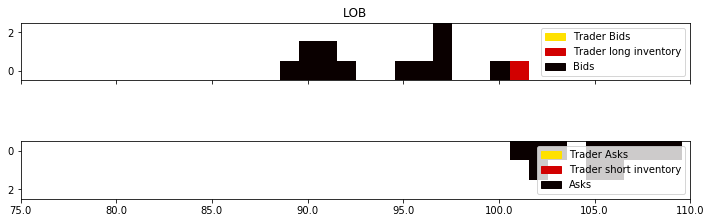

In [8]:
agent=experiment.dyna_q_agent
experiment.test_setup(MaxEpisodes=500,agent=agent)

In [9]:
d=pd.DataFrame(experiment.rwd_test)

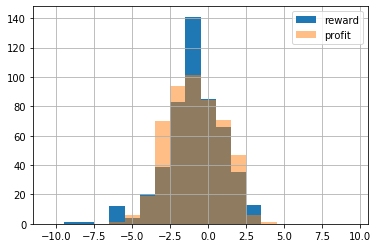

In [10]:
bins=np.arange(-10.5,10.5,1)
ax=d[4].hist(bins=bins,label='reward')
d[5].hist(bins=bins,label='profit',ax=ax,alpha=0.5)
ax.legend()

In [11]:
d.describe()

,0,1,2,3,4,5
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2006.85800,2043.982000,9449.166000,249.500000,-0.654736,-0.848000
std,1195.89717,1196.265842,5463.214863,144.481833,1.820454,1.771772
min,21.00000,24.000000,33.000000,0.000000,-8.522000,-6.000000
25%,988.00000,1018.750000,4720.000000,124.750000,-1.634000,-2.000000
50%,2001.00000,2026.500000,9372.500000,249.500000,-0.664000,-1.000000
75%,3043.75000,3072.500000,14359.500000,374.250000,0.411000,0.250000
max,4136.00000,4196.000000,18562.000000,499.000000,3.488000,4.000000


In [12]:
tab=experiment.dyna_q_agent.tabular
sample_state=tuple(tab.sample_state(reps=1))[0]
sample_action=tab.sample_action_from_state(sample_state)
sample_action,sample_state

(4, (-0.4, 1, 1, 0.0, 0, 0.1, 1.0, 0.4, 0.0))

In [36]:
tab.memory[tuple([0.1]+list(sample_state[1:]))]

{3: {'count': 275,
  'reward': Counter({0.004: 263, -4.05: 7, 0.904: 5}),
  'done': Counter({0: 268, 1: 7}),
  's_': Counter({(0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.5, 0.0), 0): 2,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.2, 0.0), 0): 18,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.0, 0.0), 0): 46,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.35, 0.0), 0): 1,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.1, 0.0), 0): 30,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.15, 0.0), 0): 22,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.05, 0.0), 0): 97,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.1, 0.0), 0): 4,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.05, 0.0), 0): 3,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.15, 0.0), 0): 4,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.95, 0.0), 0): 2,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.2, 0.0, 0.3, 0.0), 0): 2,
           (0.004, (0.1, 1, 1, 0.0, 0, 0.1, 0.0, -0.1, 0.0), 0): 12

In [46]:
state=tuple([0.1]+list(sample_state[1:]))
tab.action_counter[state].values()

dict_values([38, 1, 4, 275, 1])

In [39]:
tab.max_get_Q_UCB(state,400000)

(-0.8241619605891356, 4)

In [45]:
from math import sqrt,log
max_state_value=-100000
beta=1
total_steps=sum(tab.action_counter[state].values())


if state in tab.memory:
    UCB_num=sqrt(beta*log(total_steps))
    zero_visits=[]
    #for action,dic in tab.memory[state].items():
    for action,times_visited in tab.action_counter[state].items():

        if times_visited==0:
            zero_visits.append(action)
        else:
            UCB_denom=sqrt(2*times_visited)
            UCB=UCB_num/UCB_denom
            Q=tab.memory[state][action]['Q']
            if Q+UCB>max_state_value:
                max_action=action
                max_state_value=Q+UCB
            elif Q+UCB==max_state_value and random.random()>0.5: #break ties at random
                max_action=action
                max_state_value=Q+UCB
            print(action,state,UCB+Q,max_state_value)

0 (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.05, 0.0) -0.03023482236834829 -0.03023482236834829
1 (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.05, 0.0) 0.9214950199306793 0.9214950199306793
2 (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.05, 0.0) -0.25596988776151486 0.9214950199306793
3 (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.05, 0.0) -0.07820600729682603 0.9214950199306793
4 (0.1, 1, 1, 0.0, 0, 0.2, 0.0, -0.05, 0.0) 0.8736588637007604 0.9214950199306793


In [41]:
import random
random.random()

0.5828238914224692

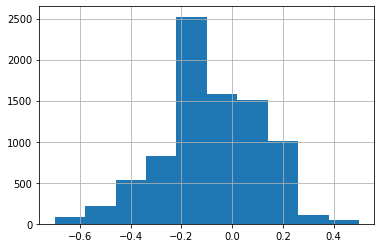

In [15]:
pd.DataFrame(list(tab.memory.keys()))[0].hist()

In [49]:
np.sqrt(np.log(experiment.total_steps)/(2*tab.memory[sample_state][sample_action]['count']))

0.6341608968320384

In [51]:
from math import sqrt,log

In [52]:
%timeit sqrt(845000)

101 ns ± 6.16 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [53]:
%timeit np.sqrt(845000)

924 ns ± 8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
def q_update(tab,sample_state,sample_action,val=0,gamma=0.5):
    if 'Q' not in tab.memory[sample_state][sample_action]:
        tab.memory[sample_state][sample_action]['Q']=val


    trans=tab.memory[sample_state][sample_action]['s_']
    denom=tab.memory[sample_state][sample_action]['count']
            #sum_a (p(s,s_,a)*(R_(s,s_,a)+gamma*terminal_state*max_a'(Q(s_,a')))
    return gamma*sum([count*(k[0]+((k[2]+1)%2)*max_get_Q(tab,k[1])) for k,count in trans.items()])/denom
    
def max_get_Q(tab,state,total_steps,val=0,beta=1):
    max_state=-1
    UCB_num=sqrt(beta*log(total_steps))
    for action,dic in tab.memory[sample_state].items():
        if 'Q' not in dic: dic['Q']=val
            
        times_visited=dic['count']
        UCB_denom=sqrt(2*times_visited)
        UCB=UCB_num/UCB_denom
            
        if dic['Q']+UCB>max_state:
            max_action=action
            max_state=dic['Q']
            
    return max_state

def wipe_update(tab,val):
    #for all q values in the memory, set to a value
    for state in tab.memory:
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']=val
            
def full_update(tab,gamma):
    for state in tab.memory:
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']+=q_update(tab,state,action,gamma)
            




In [33]:
gamma=experiment.dyna_q_agent.gamma
gamma
tab=experiment.dyna_q_agent.tabular

In [35]:
%timeit tab.full_update(gamma)

464 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
def memoize(f):
    memo = {}
    def helper(*x,**kwargs):
        if x not in memo:            
            memo[tuple(x)] = f(*x,**kwargs)
        return memo[x]
    return helper


def q_update(tab,sample_state,sample_action,max_get_Q,val=0,gamma=0.5):
    if 'Q' not in tab.memory[sample_state][sample_action]:
        tab.memory[sample_state][sample_action]['Q']=val


    trans=tab.memory[sample_state][sample_action]['s_']
    denom=tab.memory[sample_state][sample_action]['count']
            #sum_a (p(s,s_,a)*(R_(s,s_,a)+gamma*terminal_state*max_a'(Q(s_,a')))
    return sum([count*(k[0]+gamma*((k[2]+1)%2)*tab.max_get_Q(k[1])[0]) for k,count in trans.items()])/denom

def max_get_Q(tab,state,val=0):
    max_state_value=-100000

    if state in tab.memory:

        for action,dic in tab.memory[state].items():
            if 'Q' not in dic: dic['Q']=val
            if dic['Q']>max_state_value:
                max_action=action
                max_state_value=dic['Q']

    else:
        #the next state has not been experienced in memory
        max_state_value=tab.initial_Q
        max_action=np.random.randint(0,tab.n_actions)

    return max_state_value,max_action

def full_update_memo(tab,gamma):
    
    for state in tab.memory:
        mem_max_get_Q=memoize(max_get_Q) 
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']=q_update(tab,state,action,mem_max_get_Q,gamma=gamma)


In [41]:

%timeit full_update_memo(tab,gamma)

416 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:




def worker(tab,state,action,gamma):
    
    #logging.debug('Starting')
    tab.memory[state][action]['Q']+=tab.q_update(state,action,gamma=gamma)
    #logging.debug('Ending')

    
def mt():    
    gamma=0.5  
    threads=[]
    for state in tab.memory:
        for action in tab.memory[state]:
            t=threading.Thread(name=str(state)+str(action),target=worker,args=(tab,state,action,gamma,))
            threads.append(t)
            t.start()

In [37]:
%timeit mt()

1.48 s ± 6.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
from queue import Queue


def do_stuff(q):
    while not q.empty():
        
        state,action=q.get()
        #logger.debug('Starting'+str(state)+str(action))
        gamma=0.5
        tab.memory[state][action]['Q']=tab.q_update(state,action,max_get_Q,gamma=gamma)
        #logger.debug('Ending'+str(state)+str(action))
        q.task_done()
        
# LOG_FILENAME='logging_example.out'
# logger = logging.getLogger()
# fhandler = logging.FileHandler(filename=LOG_FILENAME, mode='w')
# formatter = logging.Formatter('%(asctime)s - [%(levelname)s] - %(threadName)s - %(levelname)s - %(message)s')
# fhandler.setFormatter(formatter)
# logger.addHandler(fhandler)
# logger.setLevel(logging.DEBUG)        
        

    
    
        
def qt():
    q=Queue(maxsize=0)
    num_threads=10
    
    for state in tab.memory:
        for action in tab.memory[state]:
            q.put((state,action))
    
    for i in range(num_threads):
        t=threading.Thread(target=do_stuff,args=(q,))
        #t.setDaemon(True)
        t.start()  


In [43]:
%timeit qt()




428 ms ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
from queue import Queue
q=Queue(maxsize=0)
num_threads=10

for state in tab.memory:
        for action in tab.memory[state]:
            q.put((state,action))

In [22]:
state,action=q.get()

In [16]:
callable(dict)

True